In [3]:
import pandas as pd


In [4]:

file_path = "/content/cybersecurity_intrusion_data.csv"
df = pd.read_csv(file_path)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [6]:
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [7]:
from sklearn.preprocessing import LabelEncoder




In [8]:
# Identify categorical columns
categorical_cols = ["protocol_type", "encryption_used", "browser_type"]


In [9]:
# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for reference



In [10]:
# Drop session_id since it's not a useful feature for modeling
df.drop(columns=["session_id"], inplace=True)

In [11]:
# Display the first few rows after preprocessing
df.head()

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,1,4,492.983263,1,0.606818,1,1,0,1
1,472,1,3,1557.996461,1,0.301569,0,2,0,0
2,629,1,3,75.044262,1,0.739164,2,0,0,1
3,804,2,4,601.248835,1,0.123267,0,4,0,1
4,453,1,5,532.540888,0,0.054874,1,2,0,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Define features and target variable
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]


In [14]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
# Check the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7629, 9), (1908, 9), (7629,), (1908,))

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [17]:
# Train a baseline Decision Tree
baseline_tree = DecisionTreeClassifier(random_state=42)
baseline_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [18]:
# Predict on the test set
y_pred_baseline = baseline_tree.predict(X_test)


In [19]:
# Evaluate accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_accuracy

0.8223270440251572

Train five different trees

In [20]:
# Tree 1: Limit max_depth
tree_1 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_1.fit(X_train, y_train)
acc_1 = accuracy_score(y_test, tree_1.predict(X_test))


In [21]:
# Tree 2: Increase min_samples_split
tree_2 = DecisionTreeClassifier(min_samples_split=20, random_state=42)
tree_2.fit(X_train, y_train)
acc_2 = accuracy_score(y_test, tree_2.predict(X_test))


In [22]:
# Tree 3: Increase min_samples_leaf
tree_3 = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
tree_3.fit(X_train, y_train)
acc_3 = accuracy_score(y_test, tree_3.predict(X_test))


In [23]:
# Tree 4: Use entropy instead of gini
tree_4 = DecisionTreeClassifier(criterion="entropy", random_state=42)
tree_4.fit(X_train, y_train)
acc_4 = accuracy_score(y_test, tree_4.predict(X_test))


In [24]:
# Tree 5: Combination of parameters
tree_5 = DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=5, criterion="entropy", random_state=42)
tree_5.fit(X_train, y_train)
acc_5 = accuracy_score(y_test, tree_5.predict(X_test))


In [25]:
# Store results
tree_accuracies = {
    "Baseline": baseline_accuracy,
    "Max Depth (5)": acc_1,
    "Min Samples Split (20)": acc_2,
    "Min Samples Leaf (10)": acc_3,
    "Entropy Criterion": acc_4,
    "Combination (Depth=6, Split=10, Leaf=5, Entropy)": acc_5,
}

tree_accuracies

{'Baseline': 0.8223270440251572,
 'Max Depth (5)': 0.8841719077568134,
 'Min Samples Split (20)': 0.8485324947589099,
 'Min Samples Leaf (10)': 0.8611111111111112,
 'Entropy Criterion': 0.8144654088050315,
 'Combination (Depth=6, Split=10, Leaf=5, Entropy)': 0.8862683438155137}

Visualization

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


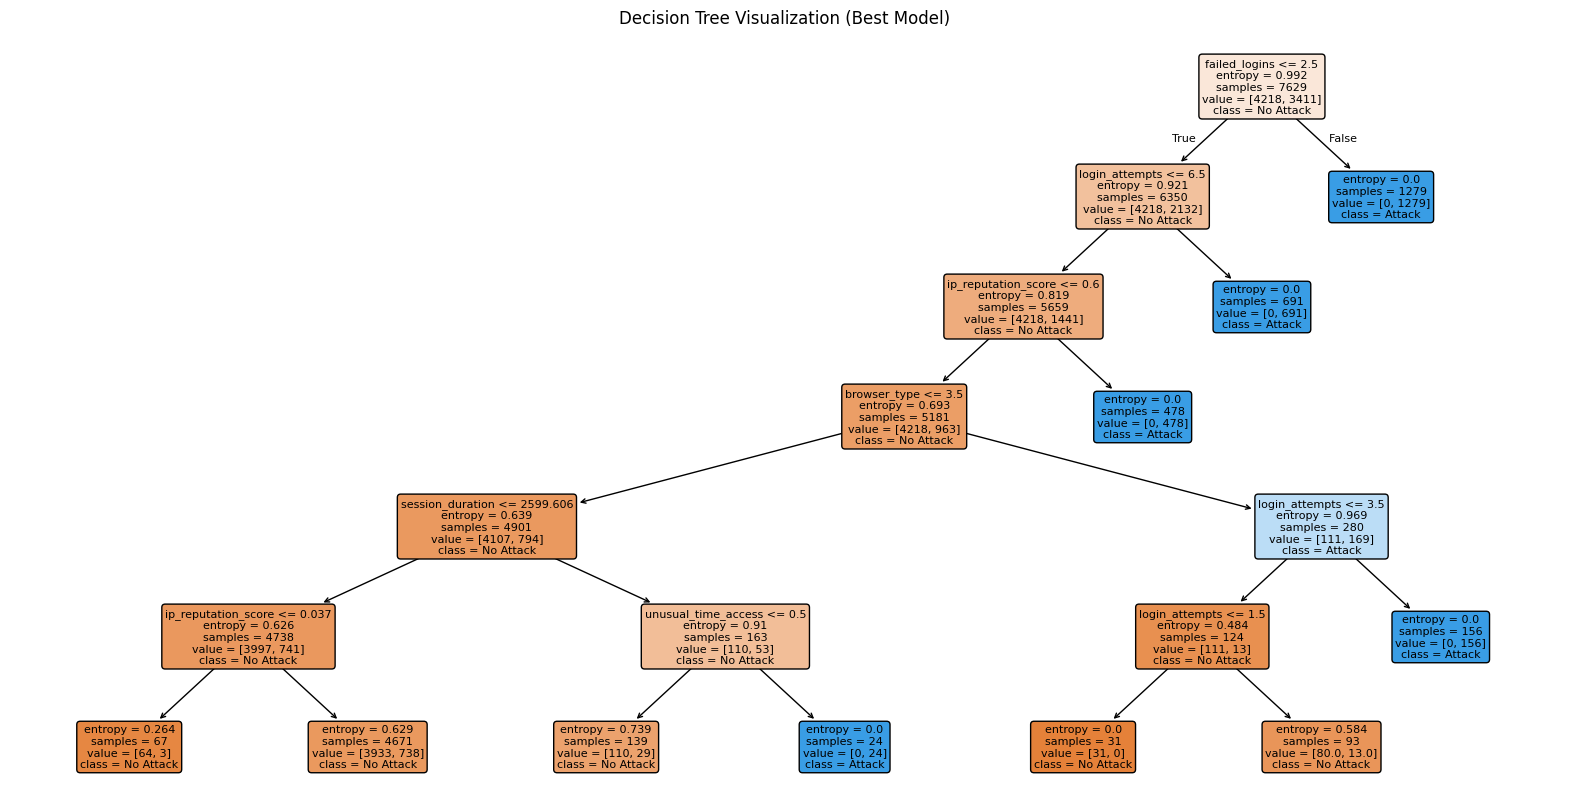

In [27]:
# Plot the best performing tree (Combination: Depth=6, Split=10, Leaf=5, Entropy)
plt.figure(figsize=(20, 10))
plot_tree(tree_5, feature_names=X.columns, class_names=["No Attack", "Attack"], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization (Best Model)")
plt.show()


Implement Adaboost

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
ada_tree1 = AdaBoostClassifier(estimator=tree_1, n_estimators=50, learning_rate=1.0, random_state=42)
ada_tree1.fit(X_train, y_train)
acc_ada1 = accuracy_score(y_test, ada_tree1.predict(X_test))

ada_tree2 = AdaBoostClassifier(estimator=tree_2, n_estimators=50, learning_rate=1.0, random_state=42)
ada_tree2.fit(X_train, y_train)
acc_ada2 = accuracy_score(y_test, ada_tree2.predict(X_test))

ada_tree3 = AdaBoostClassifier(estimator=tree_3, n_estimators=50, learning_rate=1.0, random_state=42)
ada_tree3.fit(X_train, y_train)
acc_ada3 = accuracy_score(y_test, ada_tree3.predict(X_test))

ada_tree4 = AdaBoostClassifier(estimator=tree_4, n_estimators=50, learning_rate=1.0, random_state=42)
ada_tree4.fit(X_train, y_train)
acc_ada4 = accuracy_score(y_test, ada_tree4.predict(X_test))

ada_tree5 = AdaBoostClassifier(estimator=tree_5, n_estimators=50, learning_rate=1.0, random_state=42)
ada_tree5.fit(X_train, y_train)
acc_ada5 = accuracy_score(y_test, ada_tree5.predict(X_test))

In [31]:
ada_tree_accuracies = {
    "AdaBoost Tree 1": acc_ada1,
    "AdaBoost Tree 2": acc_ada2,
    "AdaBoost Tree 3": acc_ada3,
    "AdaBoost Tree 4": acc_ada4,
    "AdaBoost Tree 5": acc_ada5,
}

ada_tree_accuracies

{'AdaBoost Tree 1': 0.8857442348008385,
 'AdaBoost Tree 2': 0.8747379454926625,
 'AdaBoost Tree 3': 0.8674004192872118,
 'AdaBoost Tree 4': 0.8128930817610063,
 'AdaBoost Tree 5': 0.8836477987421384}

In [33]:
tree_accuracies_first = {
    "Tree 1": acc_1,
    "Tree 2": acc_2,
    "Tree 3": acc_3,
    "Tree 4": acc_4,
    "Tree 5": acc_5,
}

tree_accuracies_first

{'Tree 1': 0.8841719077568134,
 'Tree 2': 0.8485324947589099,
 'Tree 3': 0.8611111111111112,
 'Tree 4': 0.8144654088050315,
 'Tree 5': 0.8862683438155137}

In [38]:
# Print header for comparison
print(f"{'Model':<25} {'Original Accuracy':<20} {'AdaBoost Accuracy':<20}")
print("-" * 65)  # Separator line

# Iterate and print accuracies
for model_name in list(tree_accuracies_first.keys()):  # Convert to list to avoid issues with the iterator
    original_accuracy = tree_accuracies_first[model_name]
    ada_accuracy = ada_tree_accuracies["AdaBoost " + model_name]  # Adjust key if needed
    print(f"{model_name:<25} {original_accuracy:20.4f} {ada_accuracy:20.4f}")  # Corrected formatting

Model                     Original Accuracy    AdaBoost Accuracy   
-----------------------------------------------------------------
Tree 1                                  0.8842               0.8857
Tree 2                                  0.8485               0.8747
Tree 3                                  0.8611               0.8674
Tree 4                                  0.8145               0.8129
Tree 5                                  0.8863               0.8836


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline # import make_pipeline

# Create a pipeline with scaling and Logistic Regression
logreg_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=2000)) # Create pipeline

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model's accuracy
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")

Logistic Regression Accuracy: 0.7285
